<a href="https://colab.research.google.com/github/Kartik-Koul/Brain-Stroke-Prediction/blob/main/Brain_Stroke_Prediction_ML_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. Importing some necessary libraries.






In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# 2. Uploading and displaying the dataset.

In [ ]:
# Converting the uploaded database into a dataframe using Pandas

df = pd.read_csv('/content/healthcare-dataset-stroke-data.csv')

In [ ]:
# Displaying the contents of the dataset

df

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


# 3. Editing attribute names, values and types.

In [ ]:
# Converting the age attribute to integer type

df.age = df.age.astype('int16')

# Changing the 'ever_married' attribute to simply 'Married'

df = df.rename(columns={'ever_married': 'Married'})

df


,id,gender,age,hypertension,heart_disease,Married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,Female,80,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,44873,Female,81,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


In [ ]:
# Finding the number of null values for each attribute

print(df.isna().sum())

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
Married                0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64


In [ ]:
# The number of null values constitute a relatively small percentage of the total records (3.9%)
# Hence, we choose to delete these records to obtain better results

df.dropna(axis=0,inplace=True)
df.isna().sum()

id                   0
gender               0
age                  0
hypertension         0
heart_disease        0
Married              0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

In [ ]:
# Checking for any duplicate entries in the dataset

df.duplicated().sum()

0

In [ ]:
# The 'id' column is unnecessary for our final results and prediction.
# Hence we remove the attribute from our dataframe.

df.drop(columns='id',inplace=True)

In [ ]:
# Generating a concise summary of the dataset

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4909 entries, 0 to 5109
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             4909 non-null   object 
 1   age                4909 non-null   int16  
 2   hypertension       4909 non-null   int64  
 3   heart_disease      4909 non-null   int64  
 4   Married            4909 non-null   object 
 5   work_type          4909 non-null   object 
 6   Residence_type     4909 non-null   object 
 7   avg_glucose_level  4909 non-null   float64
 8   bmi                4909 non-null   float64
 9   smoking_status     4909 non-null   object 
 10  stroke             4909 non-null   int64  
dtypes: float64(2), int16(1), int64(3), object(5)
memory usage: 431.5+ KB


In [ ]:
# Generating some mathematical information about all numerical attributes.
# Here we obtain the number of records, average, standard deviation, quartiles, maximum and minimum values of each numeric attribute.
df.describe()

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,4909.000000,4909.000000,4909.000000,4909.000000,4909.000000,4909.000000
mean,42.854145,0.091872,0.049501,105.305150,28.893237,0.042575
std,22.575986,0.288875,0.216934,44.424341,7.854067,0.201917
min,0.000000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,25.000000,0.000000,0.000000,77.070000,23.500000,0.000000
50%,44.000000,0.000000,0.000000,91.680000,28.100000,0.000000
75%,60.000000,0.000000,0.000000,113.570000,33.100000,0.000000
max,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


# 4. Finding some general trends in the data with respect to the different attributes.

> ## 4.1 Finding trends with respect to gender.



In [ ]:
# Finding the genders of the recorded entries in the dataset
df.gender.value_counts()

Female    2897
Male      2011
Other        1
Name: gender, dtype: int64

In [ ]:
# Here the gender value 'Other' constitutes a single record in the entire dataset.
# It is an outlier compared to the otherwise larger number of records found for males and females.
# We hence remove this single record in order to prevent some unusual effects on the prediction model.

df=df[df['gender']!='Other']
print(df.gender.value_counts())

Female    2897
Male      2011
Name: gender, dtype: int64


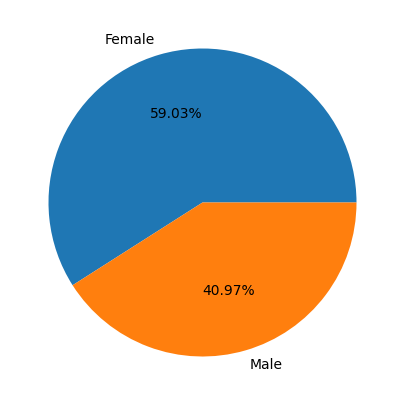

In [ ]:
# Plotting gender data in the form of a pie chart

plt.figure(figsize=(5, 5))
plt.pie(df.gender.value_counts(), labels=df.gender.value_counts().index, autopct='%1.2f%%')
plt.show()



> ## 4.2 Finding trends with respect to gender and age.



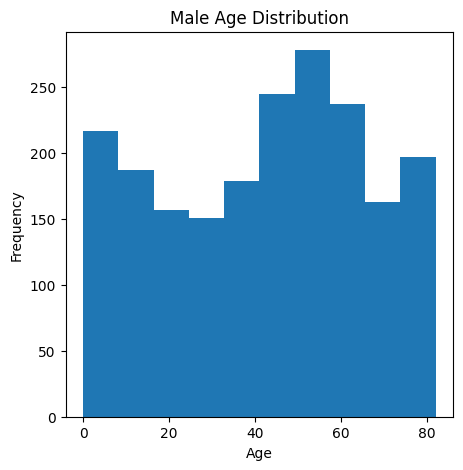

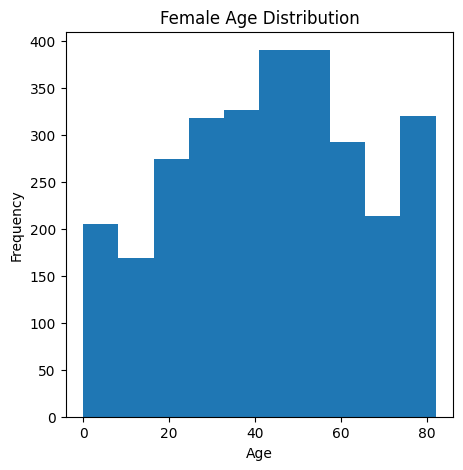

In [ ]:
# Finding the age distribution for both the gender values

plt.figure(figsize=(5, 5))
plt.hist(df[df['gender'] == 'Male']['age'], bins=10)
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Male Age Distribution')

plt.show()

print("\n")

plt.figure(figsize=(5, 5))
plt.hist(df[df['gender'] == 'Female']['age'], bins=10)
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Female Age Distribution')

plt.show()

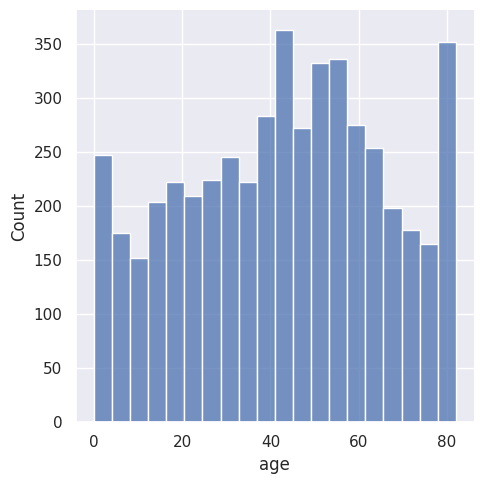

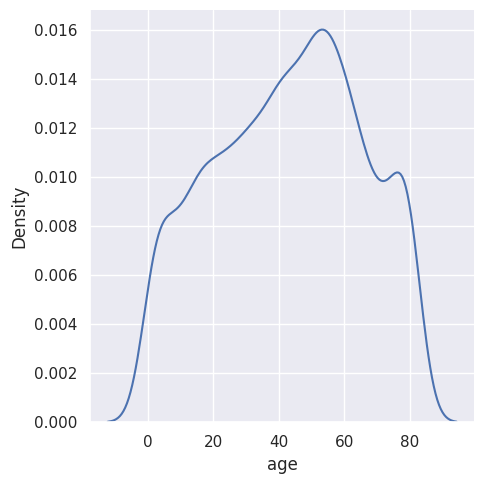

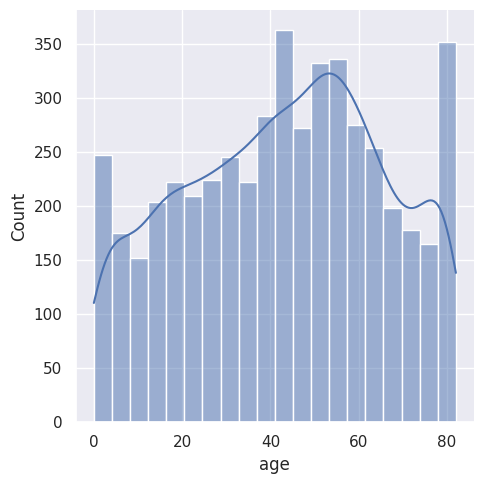

In [ ]:
# Plotting a frequency graph for the age attribute
sns.displot(df['age'])

# Plotting a density distribution curve for the attribute
sns.displot(df['age'], kind="kde")

sns.displot(df['age'], kde="True")




> ## 4.3 Finding trends with respect to gender, marriage status and hypertension.



In [ ]:
df.hypertension.value_counts()

0    4457
1     451
Name: hypertension, dtype: int64

In [ ]:
pd.crosstab(df.hypertension,df.stroke)

stroke,0,1
hypertension,,
0,4308,149
1,391,60


In [ ]:
pd.crosstab(df.gender,df.hypertension)

hypertension,0,1
gender,,
Female,2646,251
Male,1811,200


<Axes: xlabel='gender', ylabel='count'>

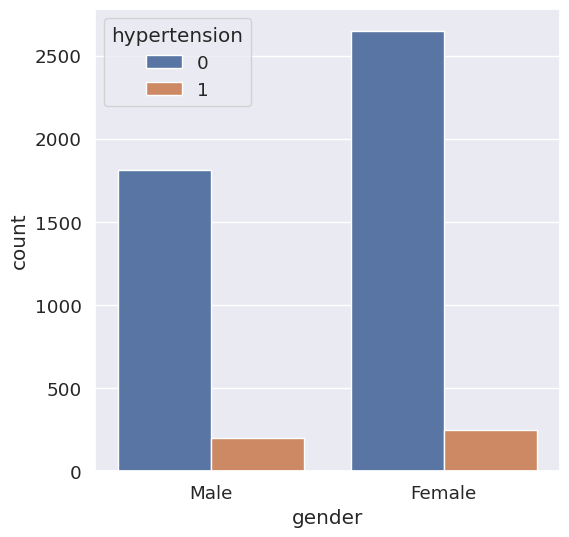

In [ ]:
sns.set(rc={'figure.figsize':(6,6)})
sns.set(font_scale=1.2)
sns.countplot(data=df,x='gender',hue=df.hypertension)

In [ ]:
df.Married.value_counts()

Yes    3204
No     1704
Name: Married, dtype: int64

In [ ]:
x=pd.crosstab([df.Married,df.gender],[df.hypertension])
print(x)

hypertension       0    1
Married gender           
No      Female   935   29
        Male     722   18
Yes     Female  1711  222
        Male    1089  182


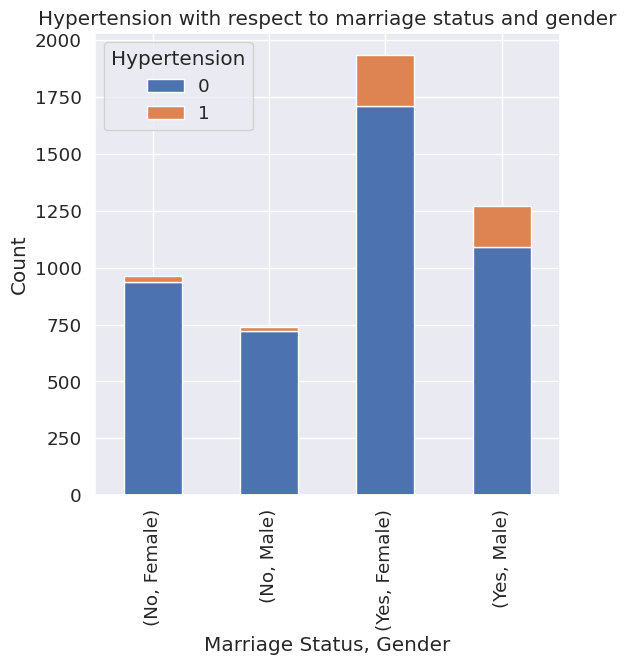

In [ ]:
x.plot(kind='bar', stacked=True)
plt.xlabel('Marriage Status, Gender')
plt.ylabel('Count')
plt.title('Hypertension with respect to marriage status and gender')
plt.legend(title='Hypertension')
plt.show()

> ## 4.4 Finding trends with respect to gender, marriage status and heart disease.

In [ ]:
df.heart_disease.value_counts()

0    4665
1     243
Name: heart_disease, dtype: int64

In [ ]:
pd.crosstab(df.gender,df.heart_disease)

heart_disease,0,1
gender,,
Female,2797,100
Male,1868,143


<Axes: xlabel='gender', ylabel='count'>

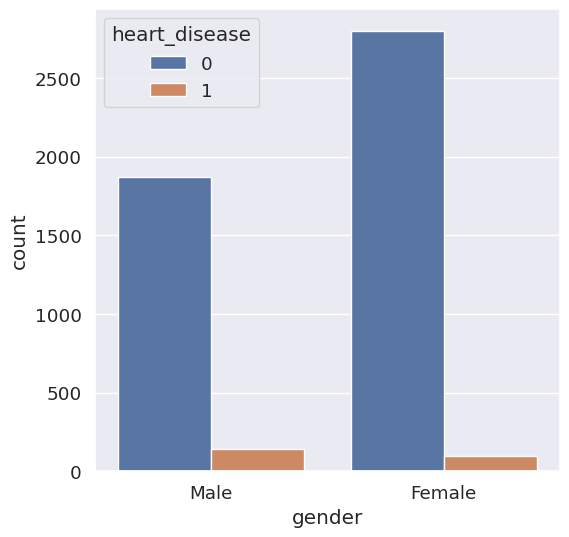

In [ ]:
sns.set(rc={'figure.figsize':(6,6)})
sns.set(font_scale=1.2)
sns.countplot(data=df,x='gender',hue=df.heart_disease)

In [ ]:
y=pd.crosstab([df.Married,df.gender],[df.heart_disease])
print(y)

heart_disease      0    1
Married gender           
No      Female   949   15
        Male     727   13
Yes     Female  1848   85
        Male    1141  130


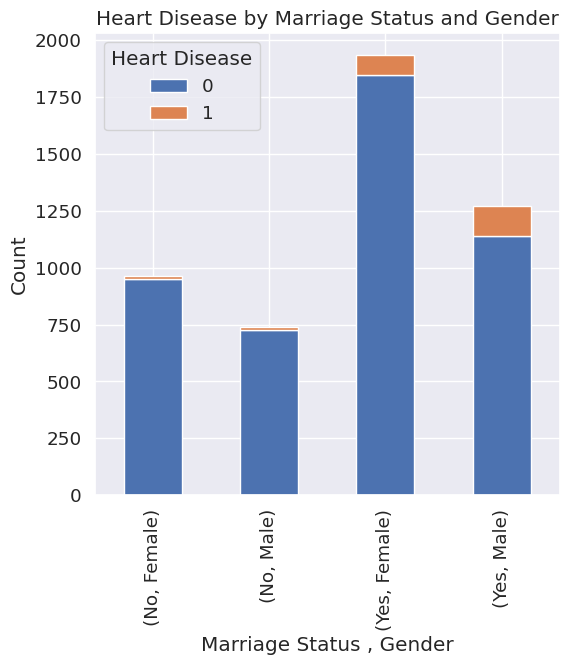

In [ ]:
y.plot(kind='bar', stacked=True)
plt.xlabel('Marriage Status , Gender')
plt.ylabel('Count')
plt.title('Heart Disease by Marriage Status and Gender')
plt.legend(title='Heart Disease')
plt.show()



> ## 4.5 Finding the trend with respect to occupation and gender in the population.



In [ ]:
df.work_type.value_counts()

Private          2810
Self-employed     775
children          671
Govt_job          630
Never_worked       22
Name: work_type, dtype: int64

In [ ]:
pd.crosstab(df.gender,df.work_type)

work_type,Govt_job,Never_worked,Private,Self-employed,children
gender,,,,,
Female,384,11,1705,477,320
Male,246,11,1105,298,351


<Axes: xlabel='work_type', ylabel='count'>

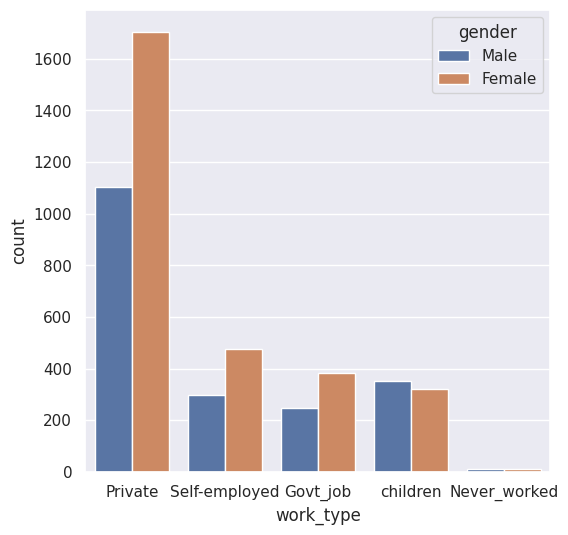

In [ ]:
sns.set(rc={'figure.figsize':(6,6)})
sns.countplot(data=df,x=df.work_type,hue=df.gender)

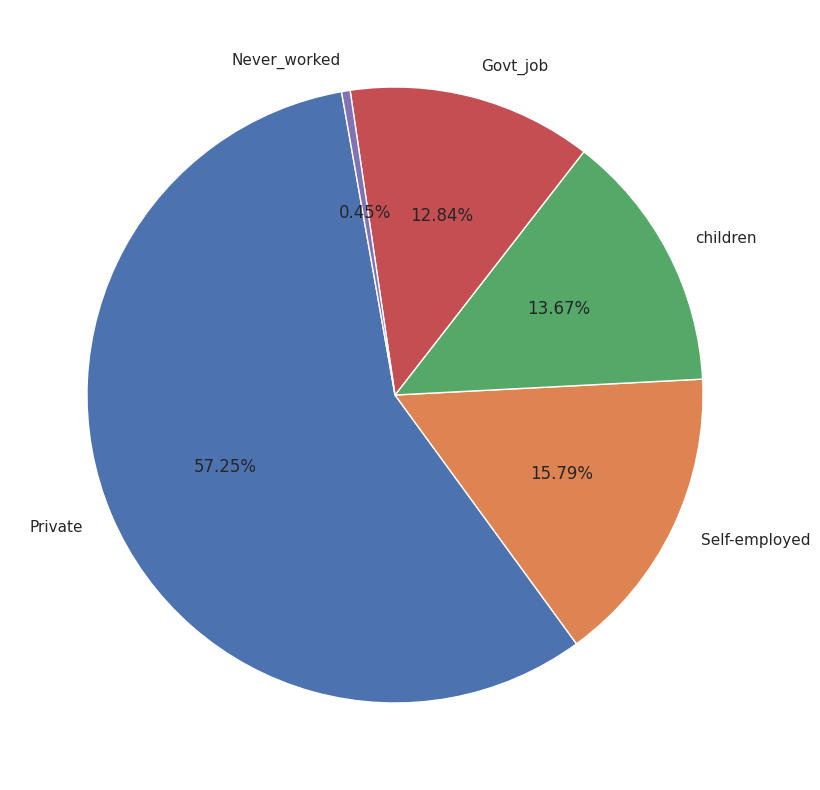

In [ ]:
x=df.work_type.value_counts()
plt.figure(figsize=(10, 10))
plt.pie(x, labels=x.index, autopct='%1.2f%%', startangle=100)
plt.show()

> ## 4.6 Finding trends with respective to nature of residence, gender and marital status.

In [ ]:
df.Residence_type.value_counts()

Urban    2490
Rural    2418
Name: Residence_type, dtype: int64

<Axes: xlabel='Residence_type', ylabel='count'>

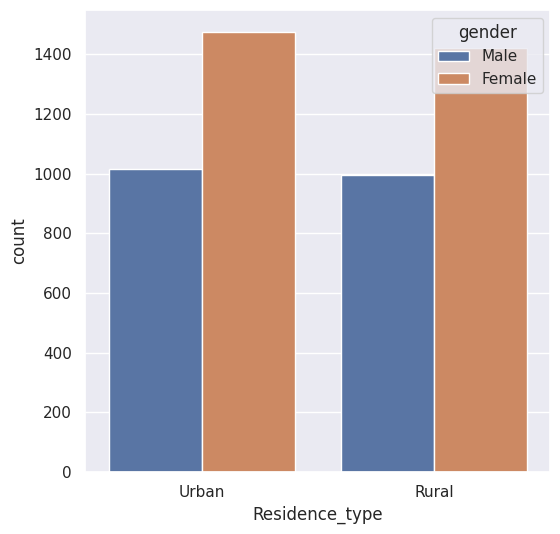

In [ ]:
sns.countplot(data=df,x=df.Residence_type,hue=df.gender)

In [ ]:
y=pd.crosstab([df.gender,df.Married],df.Residence_type)

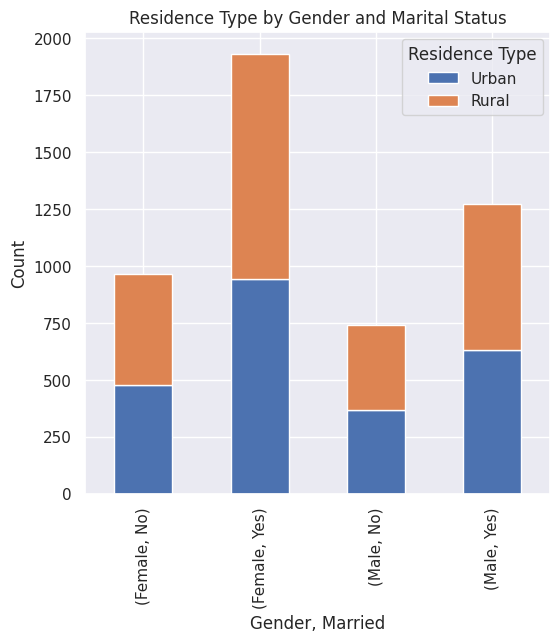

In [ ]:
y.plot(kind='bar', stacked=True)
plt.xlabel('Gender, Married')
plt.ylabel('Count')
plt.title('Residence Type by Gender and Marital Status')
plt.legend(title='Residence Type', labels=['Urban', 'Rural'])
plt.show()

> ## 4.7 Finding trends of the average glucose level in the population.

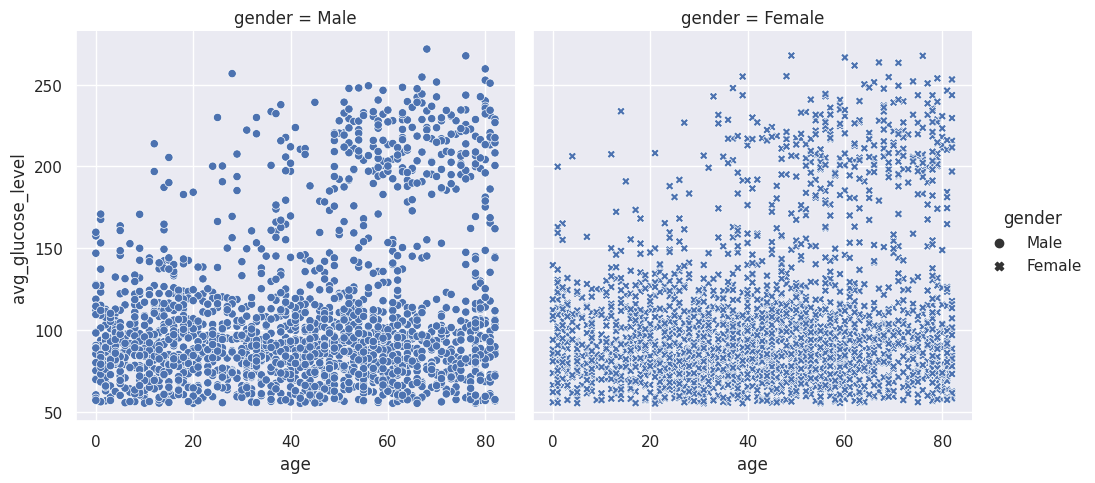

In [ ]:
sns.relplot(data=df,x='age',y='avg_glucose_level',kind='scatter',col='gender',style='gender')

<Axes: xlabel='age', ylabel='avg_glucose_level'>

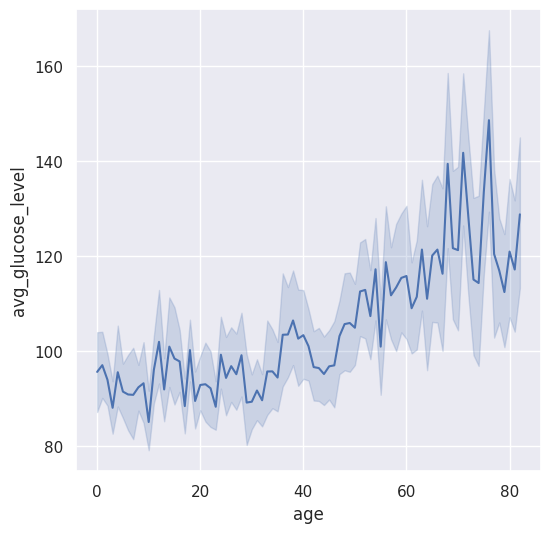

In [ ]:
sns.lineplot(data=df,x='age',y='avg_glucose_level')

> ## 4.8 Finding the trends of BMI in the population.

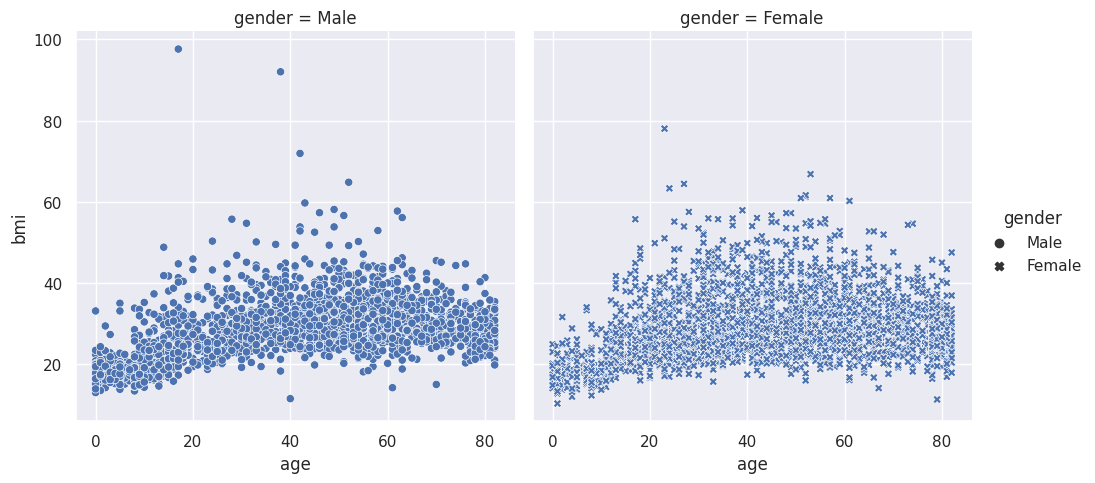

In [ ]:
sns.relplot(data=df,x='age',y='bmi',kind='scatter',col='gender',style='gender')

<Axes: xlabel='age', ylabel='bmi'>

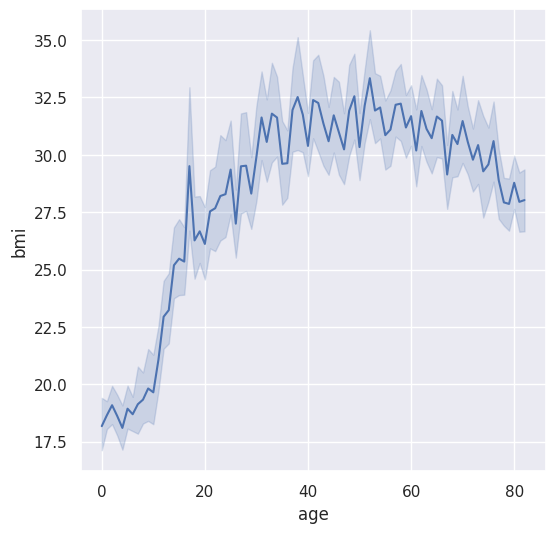

In [ ]:
sns.lineplot(data=df,x='age',y='bmi')

> ## 4.9 Finding trends of the smoking status of the population.

<Axes: xlabel='smoking_status', ylabel='count'>

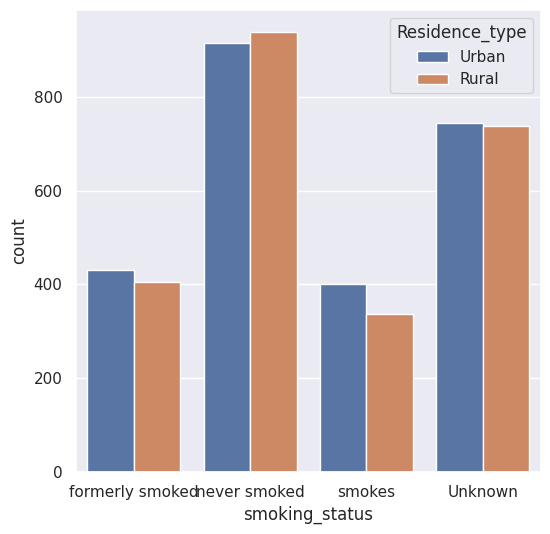

In [ ]:
sns.countplot(data=df,x=df.smoking_status,hue=df.Residence_type)

# 5. Model building using SVM

In [ ]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

In [ ]:
le=LabelEncoder()

In [ ]:
df.avg_glucose_level=df['avg_glucose_level'].astype('int32')
df.bmi=df['bmi'].astype('int32')

<ipython-input-75-3e5ea7fc919b>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.avg_glucose_level=df['avg_glucose_level'].astype('int32')
<ipython-input-75-3e5ea7fc919b>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.bmi=df['bmi'].astype('int32')


In [ ]:
df["gender"]=le.fit_transform(df["gender"])
df["Married"]=le.fit_transform(df["Married"])
df["work_type"]=le.fit_transform(df["work_type"])
df["Residence_type"]=le.fit_transform(df["Residence_type"])
df["smoking_status"]=le.fit_transform(df["smoking_status"])
df.head()

<ipython-input-59-e0d989268424>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["gender"]=le.fit_transform(df["gender"])
<ipython-input-59-e0d989268424>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Married"]=le.fit_transform(df["Married"])
<ipython-input-59-e0d989268424>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/

,gender,age,hypertension,heart_disease,Married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,1,67,0,1,1,2,1,228,36,1,1
2,1,80,0,1,1,2,0,105,32,2,1
3,0,49,0,0,1,2,1,171,34,3,1
4,0,79,1,0,1,3,0,174,24,2,1
5,1,81,0,0,1,2,1,186,29,1,1


In [ ]:
x=df.drop(columns='stroke')
y=df.stroke
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.3)

In [ ]:
model_svm = SVC(kernel = 'linear', random_state = 0)
model_svm.fit(X_train, y_train)

SVC(kernel='linear', random_state=0)

In [ ]:
y_pred = model_svm.predict(X_test)

In [ ]:
accuracy_svm = accuracy_score(y_test, y_pred)
print(accuracy_svm)

0.955193482688391


In [ ]:
classification_rep_svm = classification_report(y_test, y_pred)
print(classification_rep_svm)

              precision    recall  f1-score   support

           0       0.96      1.00      0.98      1407
           1       0.00      0.00      0.00        66

    accuracy                           0.96      1473
   macro avg       0.48      0.50      0.49      1473
weighted avg       0.91      0.96      0.93      1473



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# 6. Model building using KNN

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
knn = KNeighborsClassifier(n_neighbors=10)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

print(classification_report(y_test, y_pred))

Accuracy: 0.955193482688391
              precision    recall  f1-score   support

           0       0.96      1.00      0.98      1407
           1       0.00      0.00      0.00        66

    accuracy                           0.96      1473
   macro avg       0.48      0.50      0.49      1473
weighted avg       0.91      0.96      0.93      1473



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
